In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset into a DataFrame from Google Drive
file_path = '/content/drive/MyDrive/Data 501/Data/HousingData-SouthSide.csv'  # Update with your file path
data = pd.read_csv(file_path)



Mounted at /content/drive


<ipython-input-22-3d91af661feb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quadrant', y='Price', data=data_subset, palette='viridis')


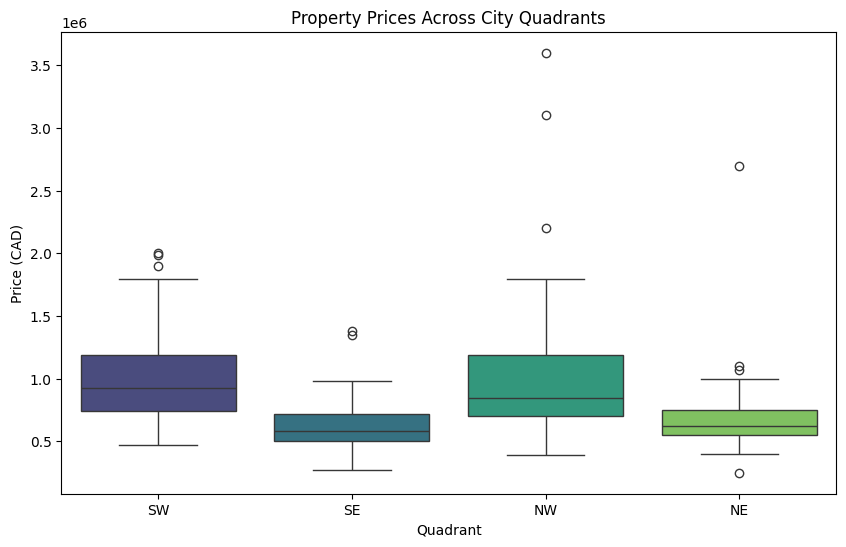

  Quadrant           mean    median            std
0       NE  667511.972222  622450.0  210150.570891
1       NW  976240.888889  849900.0  456337.159311
2       SE  621082.900000  584450.0  229937.199460
3       SW  993397.280000  924950.0  380878.217545


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains the dataset with property prices and city quadrants

# Load the dataset
data = pd.read_csv(file_path)

# Filter data for only relevant columns
data_subset = data[['Price','Quadrant']]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quadrant', y='Price', data=data_subset, palette='viridis')
plt.title('Property Prices Across City Quadrants')
plt.xlabel('Quadrant')
plt.ylabel('Price (CAD)')
plt.show()

# Group data by quadrant and calculate summary statistics
quadrant_stats = data.groupby('Quadrant')['Price'].agg(['mean', 'median', 'std']).reset_index()

# Display the summary statistics
print(quadrant_stats)



In [ ]:
# Load the dataset
data = pd.read_csv(file_path)

# Filter out entries with prices over 1000000
data = data[data['Price'] <= 1000000]

# # Preprocess 'Price' column
# data['Price'] = data['Price'].str.replace(',', '')  # Remove commas from the numbers
# data['Price'] = data['Price'].astype(float)  # Convert the values to float

# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, columns=['Basement', 'Style', 'Quadrant'])

# Separate features (X) and target variable (y)
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for feature reduction
pca = PCA(n_components=0.95) # retain 95% of variance
X_reduced = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

#max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=100)

# Train the model
model.fit(X_train, y_train)

# Predict the prices for test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Error (RMSE):", mse**0.5)


# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the average percentage error
avg_percentage_error = (mae / y.mean()) * 100

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Average Percentage Error:", avg_percentage_error, "%")

Mean Squared Error (MSE): 8449565480.951648
Mean Error (RMSE): 91921.51805182314
Mean Absolute Error (MAE): 69917.85089552238
Average Percentage Error: 10.359293579299726 %


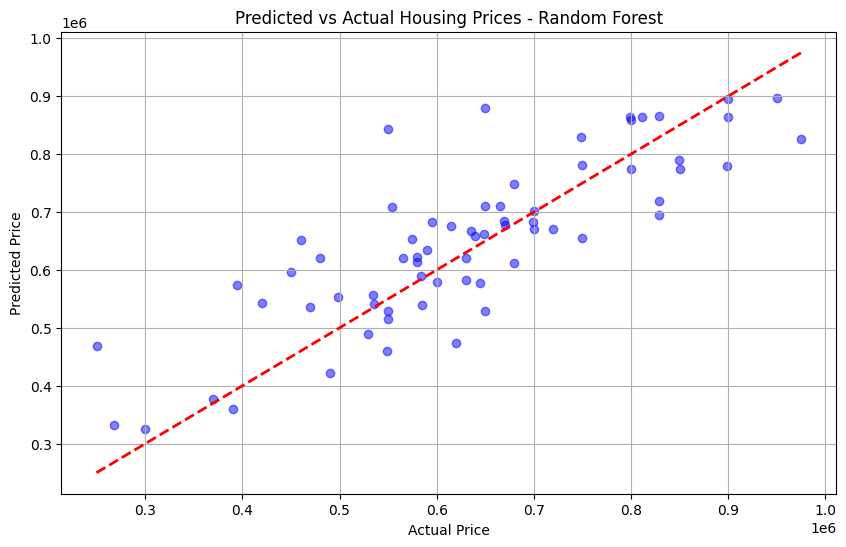

In [ ]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Predicted vs Actual Housing Prices - Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


In [ ]:
# Define price ranges
range_1 = 20000
range_2 = 50000

# Calculate the absolute errors
absolute_errors = abs(y_pred - y_test)

# Count predictions within each range
within_range_1 = sum(absolute_errors <= range_1)
within_range_2 = sum(absolute_errors <= range_2)

# Calculate accuracy rates
accuracy_rate_1 = within_range_1 / len(y_pred) * 100
accuracy_rate_2 = within_range_2 / len(y_pred) * 100

# Print the results
print(f"Model Price prediction accuracy rate within ${range_1} CAD of actual price: {accuracy_rate_1:.2f}%")
print(f"Model Price prediction accuracy rate within ${range_2} CAD of actual price: {accuracy_rate_2:.2f}%")


Model Price prediction accuracy rate within $20000 CAD of actual price: 16.42%
Model Price prediction accuracy rate within $50000 CAD of actual price: 46.27%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gradient_boost_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)

# Train the model
gradient_boost_model.fit(X_train, y_train)

# Predict the prices for test data
y_pred_gradient_boost = gradient_boost_model.predict(X_test)

# Evaluate the model
mse_gradient_boost = mean_squared_error(y_test, y_pred_gradient_boost)
print("Mean Squared Error (MSE) for Gradient Boosting:", mse_gradient_boost)
print("Root Mean Squared Error (RMSE) for Gradient Boosting:", mse_gradient_boost**0.5)

# Calculate Mean Absolute Error
mae_gradient_boost = mean_absolute_error(y_test, y_pred_gradient_boost)

# Calculate the average percentage error
avg_percentage_error_gradient_boost = (mae_gradient_boost / y.mean()) * 100

# Print the results
print("Mean Absolute Error (MAE) for Gradient Boosting:", mae_gradient_boost)
print("Average Percentage Error for Gradient Boosting:", avg_percentage_error_gradient_boost, "%")

# Calculate accuracy rates for Gradient Boosting
absolute_errors_gradient_boost = abs(y_pred_gradient_boost - y_test)
within_range_1_gradient_boost = sum(absolute_errors_gradient_boost <= range_1)
within_range_2_gradient_boost = sum(absolute_errors_gradient_boost <= range_2)
accuracy_rate_1_gradient_boost = within_range_1_gradient_boost / len(y_pred_gradient_boost) * 100
accuracy_rate_2_gradient_boost = within_range_2_gradient_boost / len(y_pred_gradient_boost) * 100

# Print the accuracy rates
print(f"Gradient Boosting Price prediction accuracy rate within ${range_1} CAD of actual price: {accuracy_rate_1_gradient_boost:.2f}%")
print(f"Gradient Boosting Price prediction accuracy rate within ${range_2} CAD of actual price: {accuracy_rate_2_gradient_boost:.2f}%")


Mean Squared Error (MSE) for Gradient Boosting: 8380683440.777883
Root Mean Squared Error (RMSE) for Gradient Boosting: 91546.07277637791
Mean Absolute Error (MAE) for Gradient Boosting: 69929.93299973733
Average Percentage Error for Gradient Boosting: 10.361083709617166 %
Gradient Boosting Price prediction accuracy rate within $20000 CAD of actual price: 20.90%
Gradient Boosting Price prediction accuracy rate within $50000 CAD of actual price: 47.76%


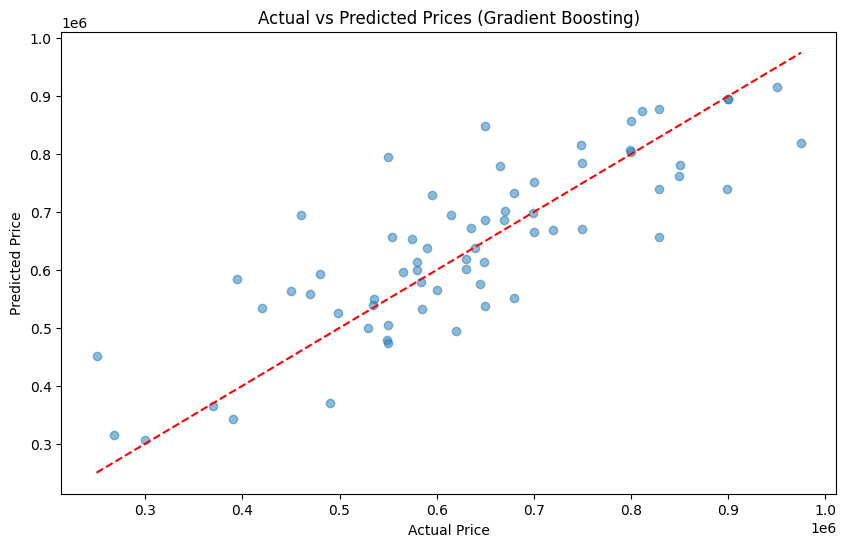

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gradient_boost, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['1.0', 'sqrt']
}

# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model Mean Squared Error (MSE):", mse_best)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Mean Squared Error (MSE): 7889391315.900536


Best Model Mean Squared Error (MSE): 7889391315.900536


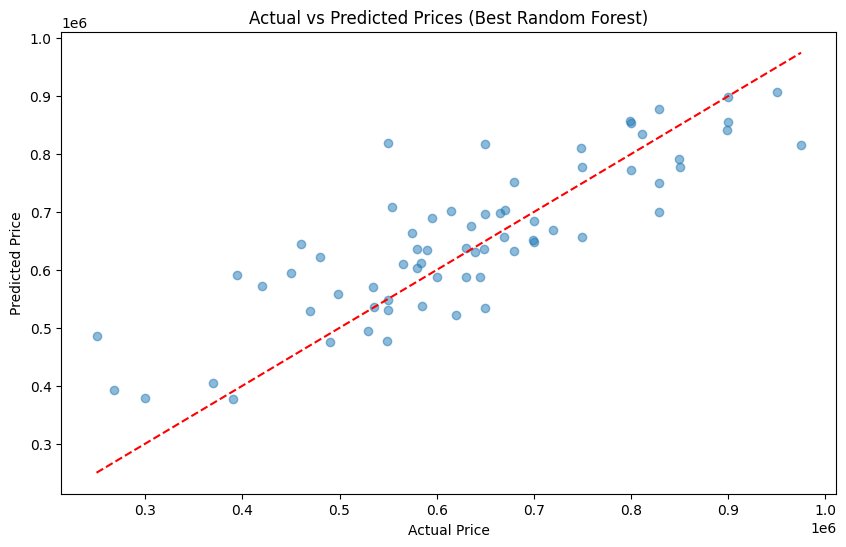

In [ ]:
# Create a Random Forest Regressor model with the best hyperparameters
best_random_forest_model = RandomForestRegressor(random_state=42, **best_params)

# Train the model
best_random_forest_model.fit(X_train, y_train)

# Predict the prices for test data using the best model
y_pred_best = best_random_forest_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model Mean Squared Error (MSE):", mse_best)

# Plot actual vs predicted prices using the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Best Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [ ]:
# Define price ranges
range_1 = 20000
range_2 = 50000

# Calculate absolute errors for both models
absolute_errors_rf = abs(y_pred_best - y_test)
absolute_errors_gb = abs(y_pred_gradient_boost - y_test)

# Count predictions within each range for both models
within_range_1_rf = sum(absolute_errors_rf <= range_1)
within_range_2_rf = sum(absolute_errors_rf <= range_2)
within_range_1_gb = sum(absolute_errors_gb <= range_1)
within_range_2_gb = sum(absolute_errors_gb <= range_2)

# Calculate accuracy rates within specified price ranges for both models
accuracy_rate_1_rf = within_range_1_rf / len(y_pred_best) * 100
accuracy_rate_2_rf = within_range_2_rf / len(y_pred_best) * 100
accuracy_rate_1_gb = within_range_1_gb / len(y_pred_gradient_boost) * 100
accuracy_rate_2_gb = within_range_2_gb / len(y_pred_gradient_boost) * 100

# Print the accuracy rates for both models
print(f"Random Forest Price prediction accuracy rate within ${range_1} CAD of actual price: {accuracy_rate_1_rf:.2f}%")
print(f"Random Forest Price prediction accuracy rate within ${range_2} CAD of actual price: {accuracy_rate_2_rf:.2f}%")
print(f"Gradient Boosting Price prediction accuracy rate within ${range_1} CAD of actual price: {accuracy_rate_1_gb:.2f}%")
print(f"Gradient Boosting Price prediction accuracy rate within ${range_2} CAD of actual price: {accuracy_rate_2_gb:.2f}%")

# Calculate and print the general accuracy for both models
general_accuracy_rf = (sum(absolute_errors_rf <= range_2) / len(y_pred_best)) * 100
general_accuracy_gb = (sum(absolute_errors_gb <= range_2) / len(y_pred_gradient_boost)) * 100
print(f"Random Forest General Price prediction accuracy rate within ${range_2} CAD of actual price: {general_accuracy_rf:.2f}%")
print(f"Gradient Boosting General Price prediction accuracy rate within ${range_2} CAD of actual price: {general_accuracy_gb:.2f}%")


Random Forest Price prediction accuracy rate within $20000 CAD of actual price: 17.91%
Random Forest Price prediction accuracy rate within $50000 CAD of actual price: 49.25%
Gradient Boosting Price prediction accuracy rate within $20000 CAD of actual price: 20.90%
Gradient Boosting Price prediction accuracy rate within $50000 CAD of actual price: 47.76%
Random Forest General Price prediction accuracy rate within $50000 CAD of actual price: 49.25%
Gradient Boosting General Price prediction accuracy rate within $50000 CAD of actual price: 47.76%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['1.0', 'sqrt']
}

# Instantiate the grid search with cross-validation
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print("Best Parameters for Gradient Boosting:", best_params_gb)

# Get the best model
best_model_gb = grid_search_gb.best_estimator_

# Evaluate the best model
best_model_gb.fit(X_train, y_train)
y_pred_best_gb = best_model_gb.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
print("Best Model Mean Squared Error (MSE) for Gradient Boosting:", mse_best_gb)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1215 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Model Mean Squared Error (MSE) for Gradient Boosting: 8302624670.876835


In [ ]:
# Calculate absolute errors for the best Gradient Boosting model
absolute_errors_gb_best = abs(y_pred_best_gb - y_test)

# Count predictions within each range for the best Gradient Boosting model
within_range_1_gb_best = sum(absolute_errors_gb_best <= range_1)
within_range_2_gb_best = sum(absolute_errors_gb_best <= range_2)

# Calculate accuracy rates within specified price ranges for the best Gradient Boosting model
accuracy_rate_1_gb_best = within_range_1_gb_best / len(y_pred_best_gb) * 100
accuracy_rate_2_gb_best = within_range_2_gb_best / len(y_pred_best_gb) * 100

# Print the accuracy rates for the best Gradient Boosting model
print(f"Gradient Boosting Best Model Price prediction accuracy rate within ${range_1} CAD of actual price: {accuracy_rate_1_gb_best:.2f}%")
print(f"Gradient Boosting Best Model Price prediction accuracy rate within ${range_2} CAD of actual price: {accuracy_rate_2_gb_best:.2f}%")

# Calculate and print the general accuracy for the best Gradient Boosting model
general_accuracy_gb_best = (sum(absolute_errors_gb_best <= range_2) / len(y_pred_best_gb)) * 100
print(f"Gradient Boosting Best Model General Price prediction accuracy rate within ${range_2} CAD of actual price: {general_accuracy_gb_best:.2f}%")


Gradient Boosting Best Model Price prediction accuracy rate within $20000 CAD of actual price: 16.42%
Gradient Boosting Best Model Price prediction accuracy rate within $50000 CAD of actual price: 52.24%
Gradient Boosting Best Model General Price prediction accuracy rate within $50000 CAD of actual price: 52.24%


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for the best Gradient Boosting model
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
print("Mean Squared Error (MSE) for the best Gradient Boosting model:", mse_best_gb)

# Calculate MSE for the best Random Forest model
mse_best_rf = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error (MSE) for the best Random Forest model:", mse_best_rf)


Mean Squared Error (MSE) for the best Gradient Boosting model: 8302624670.876835
Mean Squared Error (MSE) for the best Random Forest model: 7889391315.900536


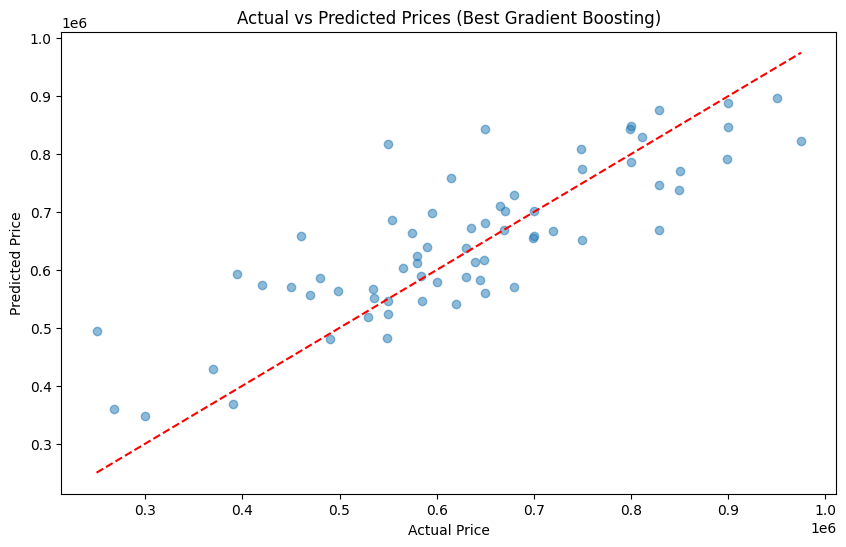

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices for the best Gradient Boosting model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Best Gradient Boosting)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [ ]:
print(data.columns)


Index(['Price', 'Address', 'Square Footage', 'Year Built', 'Bed Rooms',
       'Distance to City Core(KM)', 'Basement_ Unfinished',
       'Basement_Finished', 'Basement_Unfinished', 'Style_0', 'Style_1',
       'Style_2', 'Style_3', 'Quadrant_NE', 'Quadrant_NW', 'Quadrant_SE',
       'Quadrant_SW'],
      dtype='object')
